## Travel_agent

In [5]:
from dotenv import load_dotenv
load_dotenv()

True

In [6]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI()
llm.invoke("Hello, how are you")

AIMessage(content="Hello! I'm just a computer program, so I don't have feelings in the same way humans do. But I'm here to help you with anything you need. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 41, 'prompt_tokens': 12, 'total_tokens': 53, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BsD7ichKnU3dxlieoE68s85LiOKtP', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--90564333-8dc9-4149-b58d-57e56b4caccb-0', usage_metadata={'input_tokens': 12, 'output_tokens': 41, 'total_tokens': 53, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [14]:
from langchain_openai import OpenAIEmbeddings
embedding = OpenAIEmbeddings(model="text-embedding-3-large")


In [15]:
query = embedding.embed_query("hello, how are you")

In [16]:
len(query)

3072

In [17]:
from langgraph.graph import START, END, StateGraph, MessagesState

state = StateGraph(MessagesState)

In [18]:
from langchain_community.document_loaders import WebBaseLoader

In [19]:
url="https://lilianweng.github.io/posts/2023-06-23-agent/"

In [20]:
web_loader = WebBaseLoader(url)

In [21]:
data=web_loader.load()
data

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [22]:
data[0].metadata

{'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/',
 'title': "LLM Powered Autonomous Agents | Lil'Log",
 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\

In [23]:
len(data[0].metadata["description"])

1639

In [24]:
data[0].page_content

'\n\n\n\n\n\nLLM Powered Autonomous Agents | Lil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n|\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\n\n\n\n\n\n      LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\n \n\n\nTable of Contents\n\n\n\nAgent System Overview\n\nComponent One: Planning\n\nTask Decomposition\n\nSelf-Reflection\n\n\nComponent Two: Memory\n\nTypes of Memory\n\nMaximum Inner Product Search (MIPS)\n\n\nComponent Three: Tool Use\n\nCase Studies\n\nScientific Discovery Agent\n\nGenerative Agents Simulation\n\nProof-of-Concept Examples\n\n\nChallenges\n\nCitation\n\nReferences\n\n\n\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The

In [25]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter  = RecursiveCharacterTextSplitter()
splitter = text_splitter.from_tiktoken_encoder(chunk_size=100, chunk_overlap=25)
splitted_docs = splitter.split_documents(data)
splitted_docs

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [ ]:
## currently using in memory data base

from langchain_community.vectorstores import Chroma
vectorstore = Chroma.from_documents(
    documents=splitted_docs,
    collection_name="rag-chroma",
    embedding=embedding
)
  


In [27]:
retriever = vectorstore.as_retriever()

In [28]:
retriever.invoke("What is agent and prompt")

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consi

In [29]:
# convert this retreiver to tool
from langchain.tools.retriever import create_retriever_tool


In [32]:
retriever_tool = create_retriever_tool(retriever,"Retriever_Blog_Post", "Search and return information")

In [33]:
retriever_tool

Tool(name='Retriever_Blog_Post', description='Search and return information', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x000001C5F777AAC0>, retriever=VectorStoreRetriever(tags=['Chroma', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x000001C592E586E0>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x000001C5F777AC00>, retriever=VectorStoreRetriever(tags=['Chroma', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x000001C592E586E0>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_sep

In [34]:
tools = [retriever_tool]

In [35]:
from langgraph.prebuilt import ToolNode

In [37]:
retriver_node = ToolNode(tools)

In [38]:
from typing import Annotated, Sequence, TypedDict
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages

In [39]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [40]:
from langchain_core.prompts import PromptTemplate

In [43]:
from langchain import hub

In [44]:
hub.pull("rlm/rag-prompt").pretty_print()

================================ Human Message =================================

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: {question} 
Context: {context} 
Answer:


In [45]:
from langchain_core.pydantic_v1 import BaseModel, Field

In [47]:
class grade(BaseModel):
    binary_score: str=Field(description="Relavance score 'yes' or its going to be 'No'")

In [49]:
# we use it for type hinting
from typing import Literal

In [ ]:
def grade_documents(state: AgentState):
    llm_with_structure_op=llm.with_structured_output(grade)
    prompt = PromptTemplate(
        template=""" You are a grader decision if a document is relevant to a user's question.
        Here is the docuemnt : {context}
        Here is the user's question: {question}
        If the document talks about or contains information related to the user's question, mark it hsa relavant.
        Give a 'yes' or 'no' answer to show if t he document is relevant to the question. """,
        input_variables=["context", "question"]
    )
    chain = llm_with_structure_op | prompt
    message = state['messages']
    last_message = message[-1]
    question = message[0].content
    docs = last_message.content

    scored_result = chain.invoke({"question": question, "context": docs})
    score = scored_result.binary_score

    if score == "yes":
        print("---DESCISION: DOCS ARE RELEVANT---")
        return "generator"
    else:
        print("---DESCISION: DOCS ARE NOT RELEVANT---")
        return "rewrite"

In [ ]:
def LLM_Decision_Maker(state: AgentState):
    print("-----CALL LLM_DECISION_MAKER-----")
    message = state["messages"]
    if len(message)>1:
        last_message= message[-1]
        question=last_message.content
        prompt=PromptTemplate(
            template=""" You are a helpful assistant whatever question hs been asked to find out that in the given question and answer
            Here is the question: {question}
            """,
            input_variables=["question"]
        )
        chain = prompt | llm
        response = chain.invoke({"question": question})
        return {"messages":[response]}
    else:
        llm_with_tool=llm.bind_tools(tools)
        response = llm_with_tool.invoke(message)
        return {"messages":[response]}

In [ ]:
def generate(state:AgentState):
    print("---GENERATE---")
    message=state["messages"]
    question = message[0].content
    
    last_message = message[-1]
    docs = last_message.content

    prompt = hub.pull("rlm/rag-prompt")

    rag_chain = llm | prompt

    response = rag_chain.invoke({"context": docs, "question": question})

    print(f"this is my response :{response}")

    return {"messages": [response]}

In [ ]:
from langchain_core.messages import HumanMessage

def rewrite(state:AgentState):
    print("---TRANSFORM QUERY---")
    message = state["messages"]
    question = message[0].content
    input = [HumanMessage(content=f""" look at the input and try to reason about the underlying semantic intent or meaning.
                          Here is the initial question: {question}
                          Formulate an improved question:
""")]
    response = llm.invoke(input)
    return response

NameError: name 'AgentState' is not defined

In [95]:
from langgraph.graph import END, StateGraph, START

In [96]:
workflow = StateGraph(AgentState)

In [97]:
workflow.add_node("LLM_Descision_Maker", LLM_Decision_Maker)
workflow.add_node("Vector_Retriever", retriver_node)
workflow.add_node("Output_Generator", generate)
workflow.add_node("Query_Rewriter", rewrite)

In [98]:
workflow.add_edge(START, "LLM_Descision_Maker")

In [99]:
from langgraph.prebuilt import tools_condition

In [100]:
workflow.add_conditional_edges("LLM_Descision_Maker", 
                               tools_condition,
                               {"tools":"Vector_Retriever",
                                END:END})

In [101]:
workflow.add_conditional_edges("Vector_Retriever", 
                               grade_documents,
                               {"generator":"Output_Generator",
                                "rewriter":"Query_Rewriter"})

In [102]:
workflow.add_edge("Output_Generator", END)

In [103]:
workflow.add_edge("Query_Rewriter", "LLM_Descision_Maker")

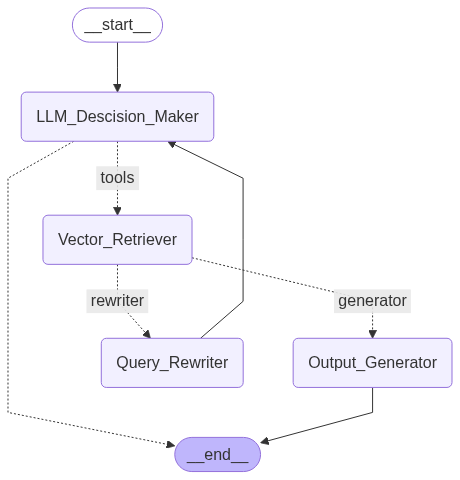

In [104]:
workflow.compile()